In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from astropy.table import Table, join
from astropy import units as u
from edge_pydb import EdgeTable

params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)

# This notebook gives a few examples of plotting the CSV tables that are found in the `dat_glob` subdirectory of `edge_pydb`.  These tables provided galaxy-wide properties from CALIFA or CARMA and are hence referred to as "global".

## Plot CO observation parameters, a la Bolatto et al. (2017) Figure 4.

In [2]:
coobs = EdgeTable('edge_coobs_DE.csv')
coobs

Name,coVsys,coDEobstim,coNpt,coDEbmaj,coDEbmin,coRMS_10,coTpk_10,coSNRpeak_10,ImagingDate_10,coRMS_20,coTpk_20,coSNRpeak_20,ImagingDate_20
,km / s,h,,arcsec,arcsec,mK,mK,,,mK,mK,,
str13,float64,float64,int64,float64,float64,float64,int64,float64,str21,float64,int64,float64,str21
ARP220,5340.9,4.0,7,4.48,3.87,41.8,3472,83.03,02/14/16 05:15:10 CST,33.0,3461,104.75,06/09/16 07:03:55 CDT
IC0480,4492.9,3.98,7,4.88,3.93,53.6,810,15.11,02/15/16 16:09:31 CST,42.3,792,18.73,06/08/16 10:40:35 CDT
IC0540,2056.6,3.33,7,6.22,3.64,65.9,375,5.69,02/12/16 17:08:14 CST,51.2,336,6.57,06/08/16 10:49:37 CDT
IC0944,6843.0,4.09,7,5.39,4.17,41.6,317,7.64,02/12/16 17:25:13 CST,32.5,278,8.54,06/08/16 10:59:27 CDT
IC1151,2159.9,2.65,7,5.32,3.78,77.2,382,4.94,02/12/16 17:40:21 CST,60.1,301,5.02,06/08/16 11:07:49 CDT
IC1199,4663.0,3.97,7,4.92,4.3,47.3,351,7.43,02/12/16 17:55:31 CST,37.1,266,7.15,06/08/16 11:16:31 CDT
IC1683,4774.9,4.34,7,4.96,3.79,48.0,785,16.35,02/12/16 18:13:26 CST,37.4,794,21.24,06/08/16 11:27:22 CDT
IC2247,4261.7,4.01,7,4.79,3.85,43.3,438,10.12,02/12/16 18:31:08 CST,34.0,416,12.25,06/08/16 11:37:39 CDT


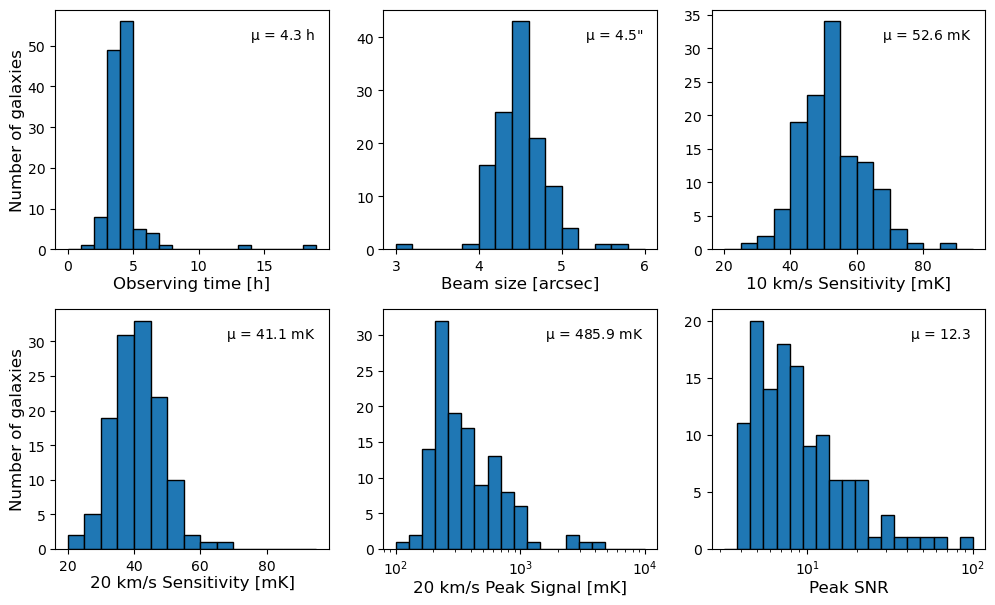

In [3]:
plt.figure(figsize=(12, 7))

ax1=plt.subplot(2,3,1)
plt.hist(coobs['coDEobstim'], bins=np.arange(0, 20, 1), ec='black')
plt.xlabel('Observing time [h]', labelpad=2, fontsize='large')
plt.ylabel('Number of galaxies', labelpad=2, fontsize='large')
ax1.text(0.95,0.88,'$\mu$ = %3.1f h' % np.mean(coobs['coDEobstim']),
    ha='right',transform=ax1.transAxes)

ax2=plt.subplot(2,3,2)
beam=np.sqrt(coobs['coDEbmaj']*coobs['coDEbmin'])
plt.hist(beam, bins=np.arange(3, 6.2, 0.2), ec='black')
plt.xlabel('Beam size [arcsec]', labelpad=2, fontsize='large')
tick_spacing = 1
ax2.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax2.text(0.95,0.88,'$\mu$ = %3.1f"' % np.mean(beam),
    ha='right', transform=ax2.transAxes)

ax3=plt.subplot(2,3,3)
plt.hist(coobs['coRMS_10'], bins=np.arange(20,100,5), ec='black')
plt.xlabel('10 km/s Sensitivity [mK]', labelpad=2, fontsize='large')
ax3.text(0.95,0.88,'$\mu$ = %4.1f mK' % np.mean(coobs['coRMS_10']),
    ha='right', transform=ax3.transAxes)

ax4=plt.subplot(2,3,4)
plt.hist(coobs['coRMS_20'], bins=np.arange(20,100,5), ec='black')
plt.xlabel('20 km/s Sensitivity [mK]', labelpad=2, fontsize='large')
plt.ylabel('Number of galaxies', labelpad=2, fontsize='large')
ax4.text(0.95,0.88,'$\mu$ = %4.1f mK' % np.mean(coobs['coRMS_20']),
    ha='right', transform=ax4.transAxes)

ax5=plt.subplot(2,3,5)
plt.hist(coobs['coTpk_20'], bins=np.logspace(2,4,num=20), ec='black')
plt.xlabel('20 km/s Peak Signal [mK]', labelpad=2, fontsize='large')
ax5.set_xscale("log")
ax5.text(0.95,0.88,'$\mu$ = %4.1f mK' % np.mean(coobs['coTpk_20']),
    ha='right', transform=ax5.transAxes)

ax6=plt.subplot(2,3,6)
plt.hist(coobs['coSNRpeak_20'], bins=np.logspace(0.5,2,num=20), ec='black')
plt.xlabel('Peak SNR', labelpad=2, fontsize='large')
ax6.set_xscale("log")
ax6.text(0.95,0.88,'$\mu$ = %4.1f' % np.mean(coobs['coSNRpeak_20']),
    ha='right', transform=ax6.transAxes)

plt.subplots_adjust(hspace=0.25)
plt.show()

## Derive $S_{CO}$ to $M_{mol}$ conversion.

In [4]:
# Calculate molecular mass for 1 Jy km/s at 1 Mpc.
# These serve as fiducial distance and flux which we will scale later.
sco  = 1 * u.Jy * u.km / u.s
dmpc = (1 * u.Mpc).to(u.pc)
alphaco = 4.3 * u.solMass * u.s / (u.K * u.km * u.pc**2) # Bolatto+13
freq = 115.271204 * u.GHz
kperjy = (1*u.Jy/u.sr).to(u.K, equivalencies=u.brightness_temperature(freq))
molmass = alphaco * kperjy * (sco/u.Jy) * dmpc**2
print('At 1 Mpc, 1 Jy km/s of CO flux is {:.1f} of H_2'.format(molmass))

At 1 Mpc, 1 Jy km/s of CO flux is 10533.1 solMass of H_2


## Plot derived CO masses, a la Bolatto et al. (2017) Figure 5.  Need to merge in two additional tables.

In [5]:
# Measured CO fluxes
natv_co = EdgeTable('edge_coflux_natv.csv')
# CALIFA params incl. distance
califa = EdgeTable('edge_califa.csv')
natv_co.join(califa)
natv_co.join(coobs)

In [6]:
print(natv_co.colnames)

['Name', 'coRactr_natv', 'coDectr_natv', 'coCtrint_natv', 'coDvhel', 'coBmaj_natv', 'coBmin_natv', 'coBpa_natv', 'coNomask_natv', 'coeNomask_natv', 'coNomaskDv_natv', 'coDilated_natv', 'coeDilated_natv', 'coSmooth_natv', 'coeSmooth_natv', 'coSmoothDv_natv', 'coMask2d_natv', 'coeMask2d_natv', 'coSNRmax_natv', 'coSNR4pix_natv', 'coSNR5pix_natv', 'cottBmaj_natv', 'cottBmin_natv', 'cottBpa_natv', 'cottNomask_natv', 'cotteNomask_natv', 'cottNomaskDv_natv', 'cottDilated_natv', 'cotteDilated_natv', 'cottSmooth_natv', 'cotteSmooth_natv', 'cottSmoothDv_natv', 'cottMask2d_natv', 'cotteMask2d_natv', 'cottSNRmax_natv', 'cottSNR4pix_natv', 'cottSNR5pix_natv', 'ID', 'caSu', 'caSg', 'caSr', 'caSi', 'caB', 'caV', 'caR', 'caRe', 'caeRe', 'caEllipticity', 'caPA', 'caR50', 'caeR50', 'caR90', 'caeR90', 'cazgas', 'cazstars', 'caAge', 'caeAge', 'caFHa', 'caFHacorr', 'caLHacorr', 'caMstars', 'caeMstars', 'caSFR', 'caeSFR', 'caOH', 'caeOH', 'caAvgas', 'caeAvgas', 'caAvstars', 'caeAvstars', 'caDistP3d', 'caDis

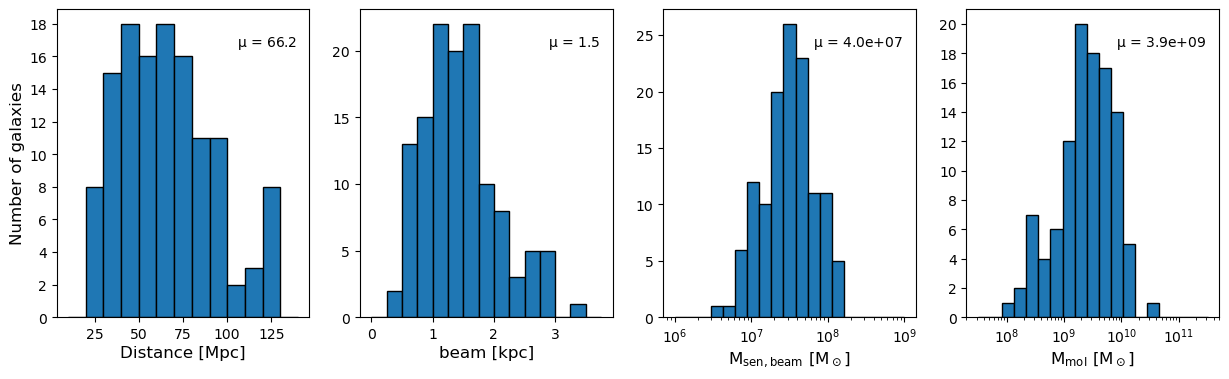

In [7]:
fig=plt.figure(figsize=(15, 4))

# Histogram of distance
ax1=plt.subplot(1,4,1)
plt.hist(natv_co['caDistMpc'],bins=np.arange(10, 150, 10), ec='black')
plt.xlabel('Distance [Mpc]', labelpad=3, fontsize='large')
plt.ylabel('Number of galaxies', labelpad=3, fontsize='large')
tick_spacing = 2
ax1.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax1.text(0.95,0.88,'$\mu$ = %3.1f' % np.mean(natv_co['caDistMpc']),
    ha='right', transform=ax1.transAxes)

# Histogram of beam physical size
ax2=plt.subplot(1,4,2)
beam = (np.sqrt(natv_co['coBmaj_natv']*natv_co['coBmin_natv'])).to(u.rad)
bmkpc = beam.value*natv_co['caDistMpc']*1000.
plt.hist(bmkpc,bins=np.arange(0, 4, 0.25), ec='black')
plt.xlabel('beam [kpc]', labelpad=3, fontsize='large')
ax2.text(0.95,0.88,'$\mu$ = %3.1f' % np.mean(bmkpc),
    ha='right', transform=ax2.transAxes)

# Histogram of beam mass sensitivity
ax3=plt.subplot(1,4,3)
# Convert mK to Jy/bm
omega_B = np.pi/(4*np.log(2)) * beam**2
conv = (u.Jy/omega_B).to(u.mK, equivalencies=u.brightness_temperature(freq))
mkperjy = conv.value
# Multiply 10 km/s noise by sqrt(3) to get sensitivity to a 30 km/s line
# Multiply by 4 to get 4-sigma sensitivity
msens = 4*molmass*(natv_co['caDistMpc']**2)*(natv_co['coRMS_10']/mkperjy)*10.*np.sqrt(3)
plt.hist(msens.value,bins=np.logspace(6, 9, num=20), ec='black')
plt.xlabel('$M_{sen,beam}$ [$M_\odot$]', labelpad=3, fontsize='large')
ax3.set_xscale("log")
ax3.text(0.95,0.88,'$\mu$ = %4.1e' % np.mean(msens.value),
    ha='right', transform=ax3.transAxes)

# Histogram of molecular gas mass
ax4=plt.subplot(1,4,4)
mgas = molmass*natv_co['caDistMpc']**2*natv_co['coSmooth_natv']
mgas = mgas[~np.isnan(mgas)]
plt.hist(mgas.value,bins=np.logspace(7.5, 11.5, num=20), ec='black')
plt.xlabel('$M_{mol}$ [$M_\odot$]', labelpad=3, fontsize='large')
ax4.set_xscale("log")
ax4.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax4.text(0.95,0.88,'$\mu$ = %4.1e' % np.mean(mgas.value),
    ha='right', transform=ax4.transAxes)

plt.show()

## CO fluxes from 7" resolution cubes

In [8]:
db = EdgeTable('edge_coflux_smo7.csv')
db.join(califa)
print('Stellar mass units:', db['caMstars'].unit)
print('SFR units:', db['caSFR'].unit)

Stellar mass units: dex(solMass)
SFR units: dex(solMass / yr)


In [9]:
# Define the subsets
valid_ssfr = (~np.isnan(db['caMstars'])) & (~np.isnan(db['caSFR']))
valid_mgas = (~np.isnan(db['caMstars'])) & (~np.isnan(db['caSFR']))
co_det  = valid_ssfr & (~np.isnan(db['coDilated_smo7']))
print('Number of CO detections:',np.count_nonzero(co_det))
co_ndet = valid_ssfr & (np.isnan(db['coDilated_smo7']))
print('Number of CO non-detections:',np.count_nonzero(co_ndet))

Number of CO detections: 105
Number of CO non-detections: 21


In [10]:
# Scale noise estimate from unmasked moment map to a more realistic velocity window
print('Median unmasked velocity width is',np.nanmedian(db['coNomaskDv_smo7']))
print('Median masked velocity width is',np.nanmedian(db['coDilatedDv_smo7']))
nsefactor = np.sqrt(np.nanmedian(db['coDilatedDv_smo7'])/np.nanmedian(db['coNomaskDv_smo7']))
print('Noise estimates will be scaled down by',nsefactor)

Median unmasked velocity width is 860.0
Median masked velocity width is 400.0
Noise estimates will be scaled down by 0.6819943394704735


In [11]:
# Calculate gas mass, gas fraction, and offset from SFMS
# Main sequence from Cano-Diaz et al. (2016ApJ...821L..26C)
delsfr  = db['caSFR'] - (0.81*db['caMstars']-8.34)
mgas = np.log10(molmass.value * db['coDilated_smo7'] * db['caDistMpc']**2)
mgas[co_ndet] = np.log10(molmass.value *
                         2*nsefactor*db['coeNomask_smo7'][co_ndet]
                         * db['caDistMpc'][co_ndet]**2)
fgas = mgas - db['caMstars']

## Scatterplots related to star-forming main sequence

(-7.0, 2.5)

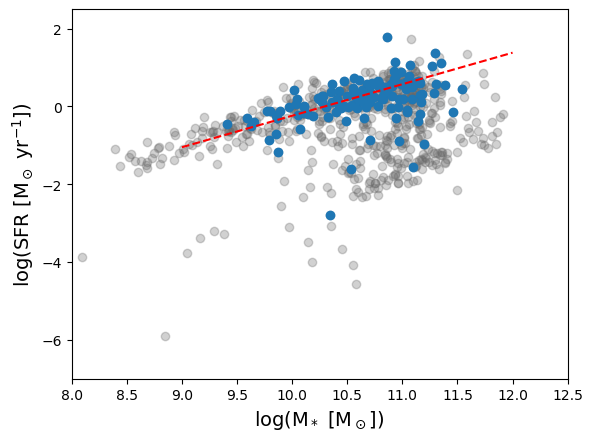

In [12]:
plt.scatter(califa['caMstars'],califa['caSFR'], c='dimgrey', alpha=0.3)
plt.scatter(db['caMstars'][valid_ssfr],db['caSFR'][valid_ssfr], c='tab:blue')
x_ms = np.linspace(9,12,num=50)
# Main sequence from Cano-Diaz et al. (2016ApJ...821L..26C)
y_ms = 0.81*x_ms-8.34
plt.plot(x_ms,y_ms,'r--')
plt.xlabel('log($M_*$ [$M_\odot$])', fontsize=14)
plt.ylabel('log(SFR [$M_\odot$ yr$^{-1}$])', fontsize=14)
plt.xlim(8,12.5)
plt.ylim(-7,2.5)

/var/folders/dr/623sc0b554s_rzxllbc_9tqc0000gn/T/ipykernel_8519/1255045184.py:1: RuntimeWarning: invalid value encountered in log10
  tgaslg = mgas.value - np.log10(db['caSFR'].value)


Text(0, 0.5, 'log($t_{dep}$ [yr])')

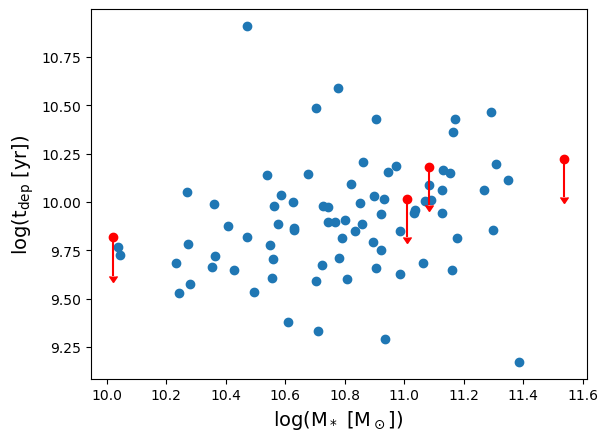

In [13]:
tgaslg = mgas.value - np.log10(db['caSFR'].value)
plt.scatter(db['caMstars'][co_det], tgaslg[co_det])
plt.scatter(db['caMstars'][co_ndet],tgaslg[co_ndet],color='red')
uplims = np.ones(db['caMstars'][co_ndet].shape)
plt.errorbar(db['caMstars'][co_ndet],tgaslg[co_ndet], uplims=uplims, 
             yerr=0.2, ls='none', color='red')
plt.xlabel('log($M_*$ [$M_\odot$])', fontsize=14)
plt.ylabel('log($t_{dep}$ [yr])', fontsize=14)

Text(0.5, 0, 'log($M(H_2)$ [$M_\\odot$])')

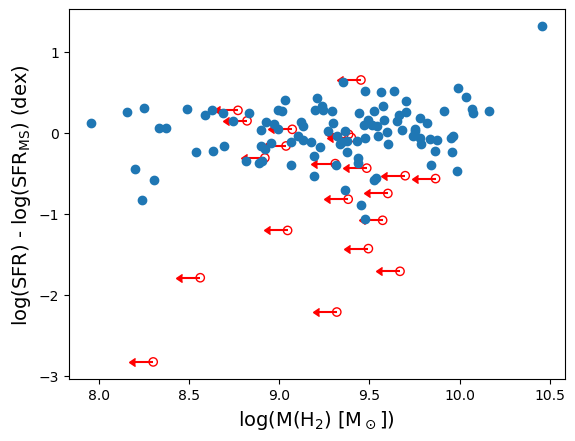

In [14]:
plt.scatter(mgas[co_det], delsfr[co_det])
plt.scatter(mgas[co_ndet],delsfr[co_ndet], facecolors='none', 
            edgecolors='r', zorder=-1)
uplims = np.ones(mgas[co_ndet].shape)
plt.errorbar(mgas[co_ndet],delsfr[co_ndet], xuplims=uplims, 
             xerr=0.1, ls='none', color='red', zorder=-2)
plt.ylabel(r'log(SFR) - log(SFR$_{\rm MS}$) (dex)', fontsize=14)
plt.xlabel('log($M(H_2)$ [$M_\odot$])', fontsize=14)

Text(0.5, 0, 'log($M(H_2)/M_*$)')

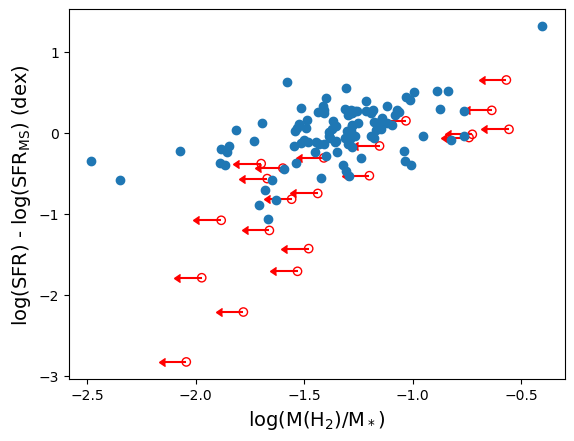

In [15]:
plt.scatter(fgas[co_det], delsfr[co_det])
plt.scatter(fgas[co_ndet],delsfr[co_ndet], facecolors='none', 
            edgecolors='r', zorder=-1)
uplims = np.ones(fgas[co_ndet].shape)
plt.errorbar(fgas[co_ndet],delsfr[co_ndet], xuplims=uplims, 
             xerr=0.1, ls='none', color='red', zorder=-2)
plt.ylabel(r'log(SFR) - log(SFR$_{\rm MS}$) (dex)', fontsize=14)
plt.xlabel('log($M(H_2)/M_*$)', fontsize=14)

## Database paper plot, EDGE only

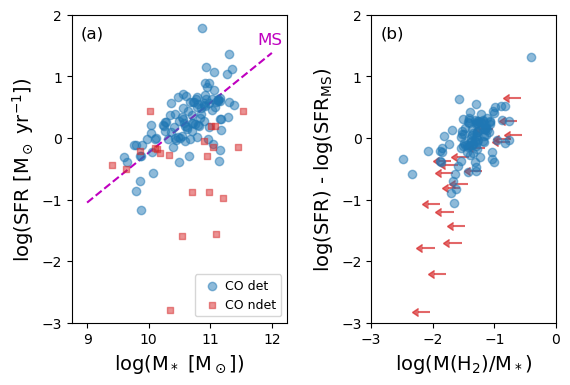

In [16]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(7,4))

# Plot the data
ax1.scatter(db['caMstars'][co_det],db['caSFR'][co_det],
            c='tab:blue', alpha=0.5, label='CO det')
ax1.scatter(db['caMstars'][co_ndet],db['caSFR'][co_ndet], marker='s',
            c='tab:red', alpha=0.5, s=20, label='CO ndet')

# Main sequence from Cano-Diaz et al. (2016ApJ...821L..26C)
x_ms = np.linspace(9,12,num=50)
y_ms = 0.81*x_ms-8.34
ax1.plot(x_ms,y_ms,'m--', zorder=-2)
ax1.legend(loc='lower right', handletextpad=0.01, fontsize=9)

# Axis labels
ax1.set_xlabel('log($M_*$ [$M_\odot$])', fontsize=14)
ax1.set_ylabel('log(SFR [$M_\odot$ yr$^{-1}$])', fontsize=14)
ax1.set_aspect('equal')
ax1.set_xlim(8.75,12.25)
ax1.set_ylim(-3,2)

# Annotations
ax1.text(0.04,0.94, '(a)', size=12, ha='left',
         va='center', transform=ax1.transAxes)
ax1.text(0.92,0.92, 'MS', size=12, ha='center', color='m',
         va='center', transform=ax1.transAxes)

# Plot the data
ax2.scatter(fgas[co_det],delsfr[co_det],c='tab:blue', alpha=0.5)

# Plot the upper limits
uplims = np.ones(fgas[co_ndet].shape)
ax2.errorbar(fgas[co_ndet], delsfr[co_ndet], xuplims=uplims, 
             xerr=0.2, ls='none', color='tab:red', zorder=-2, alpha=0.7)

# Axis labels
ax2.set_ylabel(r'log(SFR) - log(SFR$_{\rm MS}$)', fontsize=14)
ax2.set_xlabel('log($M(H_2)/M_*$)', fontsize=14)
ax2.set_aspect('equal')
ax2.set_xlim(-3,0)
ax2.set_ylim(-3,2)
ax2.text(0.05,0.94, '(b)', size=12, ha='left', va='center', transform=ax2.transAxes)

plt.subplots_adjust(wspace=0.1)
plt.savefig('sfms.pdf', bbox_inches='tight')

## Database paper plot, EDGE+DR3

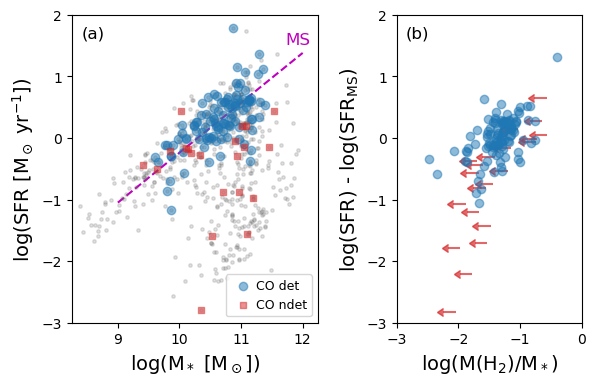

In [17]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(7.25,4))

# Plot the data
ax1.scatter(califa['caMstars'],califa['caSFR'], c='dimgrey', s=6, alpha=0.2)
ax1.scatter(db['caMstars'][co_det],db['caSFR'][co_det],
            c='tab:blue', alpha=0.5, label='CO det')
ax1.scatter(db['caMstars'][co_ndet],db['caSFR'][co_ndet], marker='s',
            c='tab:red', alpha=0.5, s=20, label='CO ndet')

# Main sequence from Cano-Diaz et al. (2016ApJ...821L..26C)
x_ms = np.linspace(9,12,num=50)
y_ms = 0.81*x_ms-8.34
ax1.plot(x_ms,y_ms,'m--', zorder=-2)
ax1.legend(loc='lower right', handletextpad=0.01, fontsize=9)

# Axis labels
ax1.set_xlabel('log($M_*$ [$M_\odot$])', fontsize=14)
ax1.set_ylabel('log(SFR [$M_\odot$ yr$^{-1}$])', fontsize=14)
ax1.set_aspect('equal')
ax1.set_xlim(8.25,12.25)
ax1.set_ylim(-3,2)

# Annotations
ax1.text(0.04,0.94, '(a)', size=12, ha='left',
         va='center', transform=ax1.transAxes)
ax1.text(0.92,0.92, 'MS', size=12, ha='center', color='m',
         va='center', transform=ax1.transAxes)

# Plot the data
ax2.scatter(fgas[co_det],delsfr[co_det],c='tab:blue', alpha=0.5)

# Plot the upper limits
uplims = np.ones(fgas[co_ndet].shape)
ax2.errorbar(fgas[co_ndet], delsfr[co_ndet], xuplims=uplims, 
             xerr=0.2, ls='none', color='tab:red', zorder=-2, alpha=0.7)

# Axis labels
ax2.set_ylabel(r'log(SFR) - log(SFR$_{\rm MS}$)', fontsize=14)
ax2.set_xlabel('log($M(H_2)/M_*$)', fontsize=14)
ax2.set_aspect('equal')
ax2.set_xlim(-3,0)
ax2.set_ylim(-3,2)
ax2.text(0.05,0.94, '(b)', size=12, ha='left', va='center', transform=ax2.transAxes)

plt.subplots_adjust(wspace=0.1)
plt.savefig('sfms_dr3.pdf', bbox_inches='tight')